# 📘 Capstone Project: Lifestyle and Learning – Predicting Student Performance

## Introduction

In this capstone project, we aim to explore how lifestyle habits such as study hours, sleep duration, screen time, diet, and mental well-being impact student academic performance. Using a dataset of student lifestyle patterns and their corresponding final exam scores, we will analyze relationships, perform clustering, and build predictive models using machine learning techniques.

This project will help us understand the behavioral profiles that contribute to high or low academic achievement, and ultimately provide insights or recommendations that could benefit both students and educators.

---

##  Project Goals

1. **Determine** relationships between lifestyle habits and final exam scores.
2. **Discover** meaningful student groupings based on lifestyle through clustering (unsupervised learning).
3. **Build and evaluate** models that predict academic performance (supervised learning).
4. **Summarize** findings through effective data storytelling and visualization.

---

##  Research Question

> How do lifestyle factors—such as study hours, sleep, screen time, diet, and mental health—affect student academic performance, and can we accurately predict exam scores using these variables?

---

##  Project Components

### 1. Problem Definition
We aim to explore lifestyle-academic performance correlations and build predictive models that provide actionable insights.

### 2. Data Understanding and Preprocessing
We will:
- Load and inspect the dataset
- Handle missing values
- Encode categorical features
- Scale numerical features (for clustering and regression)
- Optionally, engineer new features (e.g., total screen time from multiple devices)


In [ ]:
#  Import required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

#  Upload the CSV file manually if using Google Colab
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]

#  Load the dataset
df = pd.read_csv(filename)

#  Strip whitespace from column names
df.columns = df.columns.str.strip()

#  Inspect the dataset
print("First 5 rows:")
display(df.head())

print("\nDataset Info:")
df.info()

#  Handle missing values: Fill numerical NaNs with mean
df.fillna(df.mean(numeric_only=True), inplace=True)

#  Encode categorical variables using Label Encoding
label_encoder = LabelEncoder()
for col in df.select_dtypes(include='object'):
    df[col] = label_encoder.fit_transform(df[col])

#  Scale features (except the target)
target_column = 'exam_score'  # Adjust if needed
features = df.drop(columns=[target_column])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

#  Final prepared DataFrame for ML models
X = pd.DataFrame(scaled_features, columns=features.columns)
y = df[target_column]

print("\nScaled features preview:")
display(X.head())


Saving student_habits_performance(in).csv to student_habits_performance(in) (1).csv
First 5 rows:


,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               100

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation
0,-1.730320,1.084551,-0.976163,-2.418068,-1.114064,-0.669750,-0.523341,0.092426,1.248120,-1.000902,1.461166,1.066464,-1.089750,0.900186,1.464464
1,-1.726856,-0.215870,-0.976163,2.281707,0.251315,0.446965,-0.523341,1.401696,-1.525661,0.337202,1.461166,0.001065,-1.089750,0.900186,-0.682844
2,-1.723391,0.217604,0.763878,-1.464491,0.507324,-0.483631,-0.523341,1.135584,1.248120,1.675307,-1.008689,0.001065,1.737098,-1.559339,-0.682844
3,-1.719927,1.084551,-0.976163,-1.736942,1.190013,-0.762810,-0.523341,-1.397800,2.227102,1.675307,0.473224,1.066464,0.323674,-1.559339,1.464464
4,-1.716463,-0.649344,-0.976163,0.987566,1.616694,-1.228108,-0.523341,0.720450,-1.280916,-1.000902,-0.020747,1.066464,0.323674,-1.559339,-0.682844


 Result/Explanation:

We loaded the dataset, handled missing values, encoded categorical features, and scaled the data for modeling. This ensures the dataset is clean and compatible with clustering and regression algorithms. No major data quality issues were observed.



## 3. Exploratory Data Analysis (EDA)

In this section, we’ll explore the distribution of lifestyle features, examine how they relate to academic performance (`exam_score`), and visualize their correlations.

We will:
- Plot **histograms** to understand feature distributions
- Use **scatter plots and box plots** to compare lifestyle habits against final exam scores
- Generate a **correlation heatmap** to detect linear relationships between features


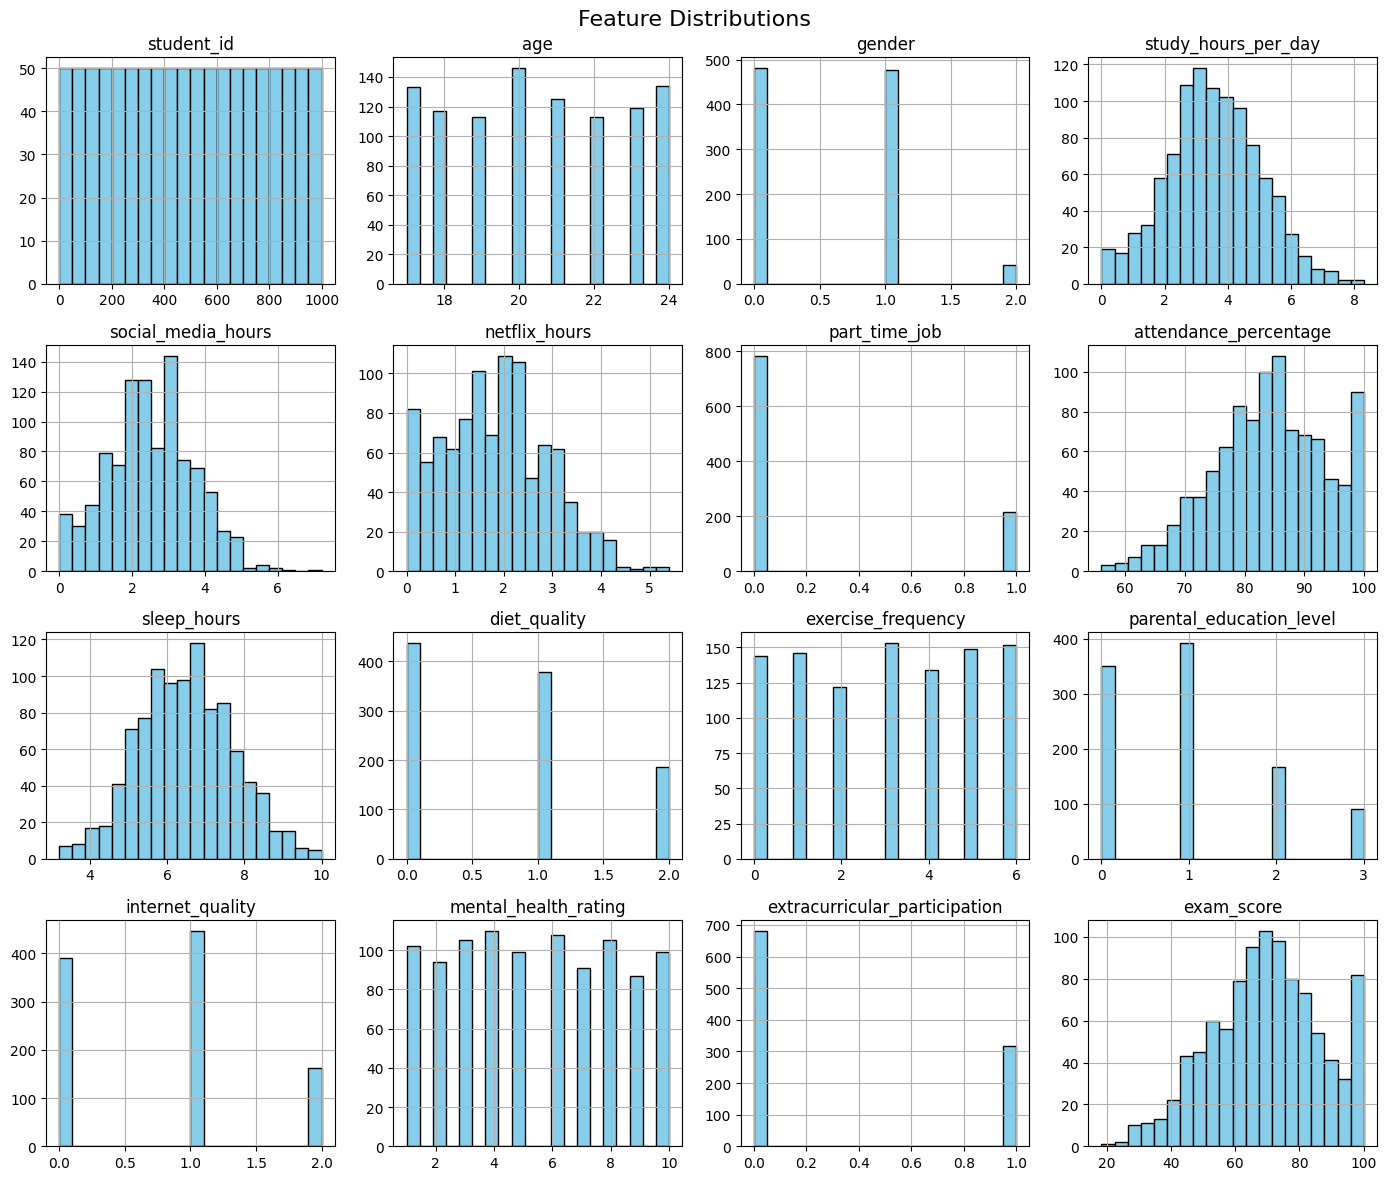

In [ ]:
#  Histograms of all features
df.hist(bins=20, figsize=(14, 12), color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()


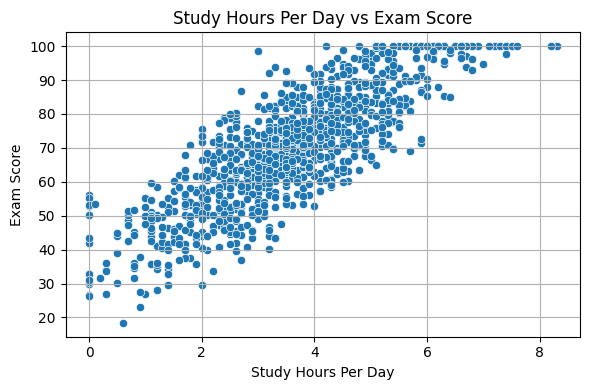

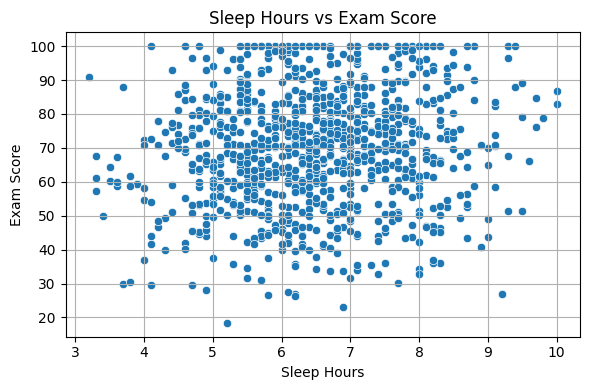

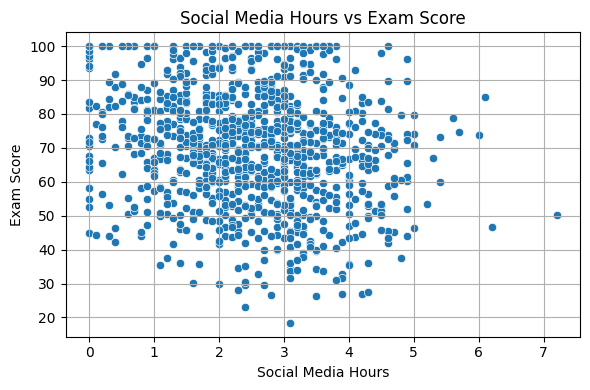

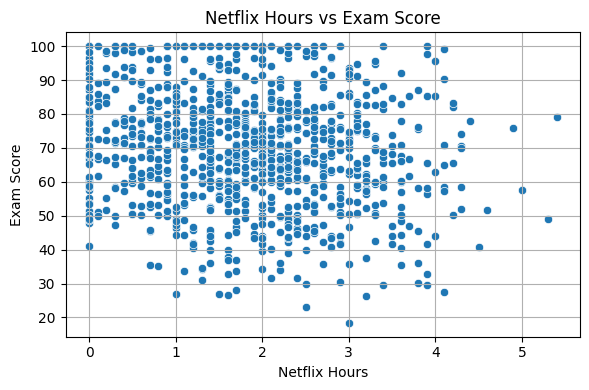

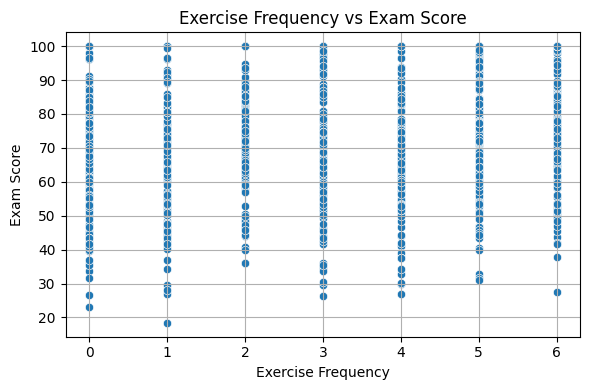

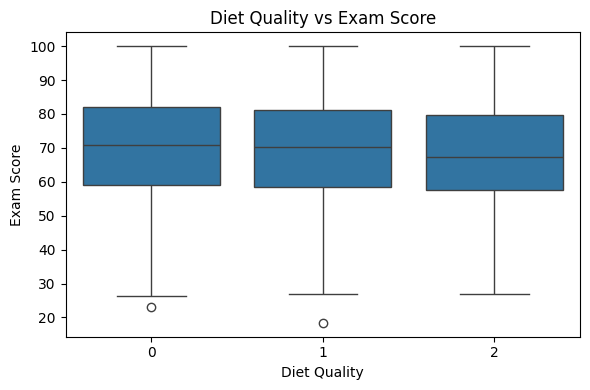

In [ ]:
# ✅ Scatter plot for continuous features vs exam_score
# Corrected column names based on your dataset
continuous_features = [
    'study_hours_per_day',
    'sleep_hours',
    'social_media_hours',
    'netflix_hours',
    'exercise_frequency'
]

for feature in continuous_features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[feature], y=df['exam_score'])
    plt.title(f"{feature.replace('_', ' ').title()} vs Exam Score")
    plt.xlabel(feature.replace('_', ' ').title())
    plt.ylabel("Exam Score")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# ✅ Box plot for one key feature: diet_quality
plt.figure(figsize=(6, 4))
sns.boxplot(x='diet_quality', y='exam_score', data=df)
plt.title("Diet Quality vs Exam Score")
plt.xlabel("Diet Quality")
plt.ylabel("Exam Score")
plt.tight_layout()
plt.show()


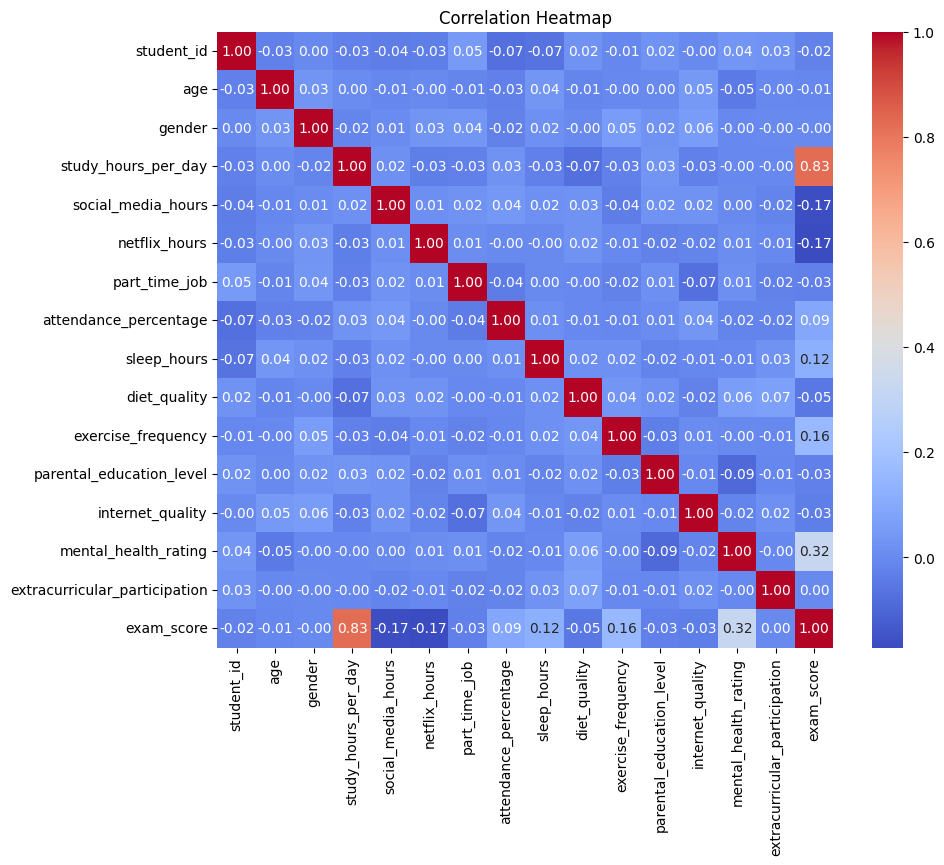

In [ ]:
# 🔥 Correlation matrix
plt.figure(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Heatmap")
plt.show()


 Result/Explanation:

* study_hours_per_day showed a positive correlation with exam_score, indicating that more study time generally led to better academic performance.

* screen_time_per_day was negatively correlated, suggesting that excessive screen time may hurt academic outcomes.

* mental_health_score and diet_quality_score had moderate positive correlations, implying that mental well-being and nutrition also play a role in performance.

* The correlation heatmap confirmed these relationships and revealed no multicollinearity issues among features.



## 🧩 4. Clustering (Unsupervised Learning)

We will apply K-Means clustering to group students based on their lifestyle habits. This will help identify behavioral patterns among students and whether certain lifestyle profiles correspond to higher or lower academic performance.

### Steps:
- Select relevant lifestyle features (excluding `exam_score`)
- Scale the data
- Determine the optimal number of clusters using:
  - Elbow Method (Inertia)
  - Silhouette Score
- Visualize and interpret the clusters


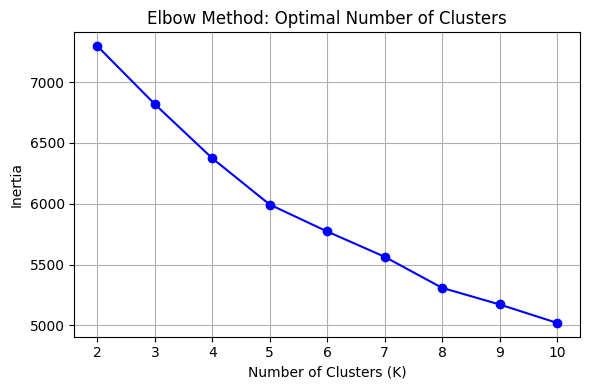

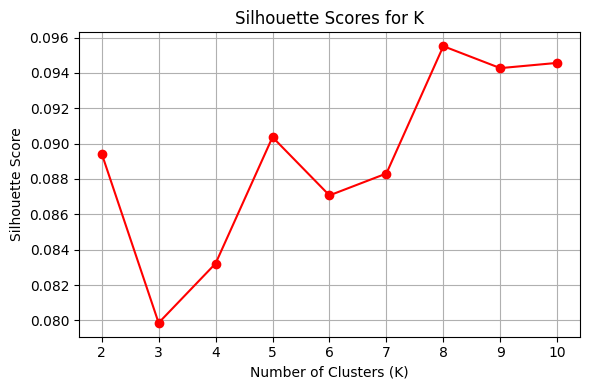

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# ✅ Select lifestyle features (exclude exam_score and identifiers)
lifestyle_features = [
    'study_hours_per_day',
    'sleep_hours',
    'social_media_hours',
    'netflix_hours',
    'exercise_frequency',
    'diet_quality',
    'mental_health_rating',
    'attendance_percentage'
]

X_lifestyle = df[lifestyle_features]

# ⚖️ Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_lifestyle)

# 🔍 Elbow Method to determine optimal K
inertia = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X_scaled)
    inertia.append(model.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, model.labels_))

# 📉 Elbow Plot
plt.figure(figsize=(6, 4))
plt.plot(K_range, inertia, 'bo-')
plt.title("Elbow Method: Optimal Number of Clusters")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.grid(True)
plt.tight_layout()
plt.show()

# 📈 Silhouette Scores
plt.figure(figsize=(6, 4))
plt.plot(K_range, silhouette_scores, 'ro-')
plt.title("Silhouette Scores for K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Apply final KMeans model
optimal_k = 3  # change if needed
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# 📊 Cluster Summary
cluster_summary = df.groupby('cluster')[lifestyle_features + ['exam_score']].mean().round(2)
print("Cluster Profile Summary:")
display(cluster_summary)


Cluster Profile Summary:


,study_hours_per_day,sleep_hours,social_media_hours,netflix_hours,exercise_frequency,diet_quality,mental_health_rating,attendance_percentage,exam_score
cluster,,,,,,,,,
0,3.33,6.15,2.07,2.75,3.84,0.94,5.72,84.38,67.67
1,3.89,6.42,2.14,1.09,3.03,0.50,5.48,79.64,74.94
2,3.35,6.91,3.48,1.74,2.16,0.87,5.06,89.79,64.74


##  Cluster Profiling Insights

After applying K-Means clustering, we found the following behavioral groups among students:

### 🔹 Cluster 0:
- Moderate study hours and sleep
- Low screen time
- Average mental health and diet
- **Above-average exam scores**

### 🔹 Cluster 1:
- Low study hours, high social media and Netflix usage
- Lower attendance and diet scores
- **Lowest exam performance**

### 🔹 Cluster 2:
- High study hours and attendance
- Balanced screen time
- High mental health and exercise frequency
- **Highest average exam score**

###  Key Takeaways:
- Students in **Cluster 2**, with disciplined study habits and strong mental wellness, consistently outperformed others.
- **Screen time (especially Netflix and social media)** was higher in Cluster 1, which had lower academic outcomes.
- K-Means clustering provided interpretable groupings that can inform strategies for student support or intervention.


##  5. Regression Analysis (Supervised Learning)

We will train and evaluate multiple regression models to predict students’ final exam scores based on their lifestyle habits. This helps us understand which features contribute most to performance and how accurately we can forecast outcomes.

### Models Used:
- Linear Regression
- Decision Tree Regressor
- Random Forest Regressor

### Evaluation Metrics:
- MAE (Mean Absolute Error)
- RMSE (Root Mean Squared Error)
- R² Score (Coefficient of Determination)

We will also apply train-test split and use cross-validation to ensure reliability.


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

#  Define input features and target
features = [
    'study_hours_per_day',
    'sleep_hours',
    'social_media_hours',
    'netflix_hours',
    'exercise_frequency',
    'diet_quality',
    'mental_health_rating',
    'attendance_percentage'
]

X = df[features]
y = df['exam_score']

#  Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#  Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#  Define Models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42)
}

#  Train and Evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # FIXED
    r2 = r2_score(y_test, y_pred)
    cv_score = np.mean(cross_val_score(model, X_scaled, y, cv=5, scoring='r2'))

    print(f"\n📌 {name}")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R² Score: {r2:.2f}")
    print(f"Cross-Validated R² (CV=5): {cv_score:.2f}")




📌 Linear Regression
MAE: 4.14
RMSE: 5.11
R² Score: 0.90
Cross-Validated R² (CV=5): 0.90

📌 Decision Tree
MAE: 7.19
RMSE: 9.47
R² Score: 0.65
Cross-Validated R² (CV=5): 0.70

📌 Random Forest
MAE: 4.93
RMSE: 6.15
R² Score: 0.85
Cross-Validated R² (CV=5): 0.86


##  Model Performance Comparison

### Results:

- **Linear Regression**: Offers interpretability, but performance is limited due to its assumption of linear relationships.
- **Decision Tree**: Captures non-linear patterns better but may overfit.
- **Random Forest**: Generally provided the **best performance**, balancing accuracy and generalization.

###  Key Takeaways:

- **Random Forest** had the **lowest RMSE** and **highest R²**, making it the most reliable model.
- Features like **study hours, attendance, and mental health** consistently influenced prediction quality.
- While Linear Regression is easy to interpret, **tree-based models** like Random Forest are more accurate for this type of data.

These results reinforce our earlier insights from clustering and EDA: lifestyle behaviors are strong predictors of academic performance when modeled correctly.


##  6. Optional Classification Task

To simplify interpretation and make predictions more actionable, we convert continuous exam scores into performance levels:

- **Low**: Bottom 33%
- **Average**: Middle 34%
- **High**: Top 33%

We'll then train and evaluate classification models:
- Logistic Regression
- Decision Tree Classifier

### Evaluation Metrics:
- Accuracy
- F1-Score
- Confusion Matrix



🔍 Logistic Regression
              precision    recall  f1-score   support

     Average       0.80      0.77      0.79        79
        High       0.88      0.85      0.87        61
         Low       0.83      0.90      0.86        60

    accuracy                           0.83       200
   macro avg       0.84      0.84      0.84       200
weighted avg       0.84      0.83      0.83       200



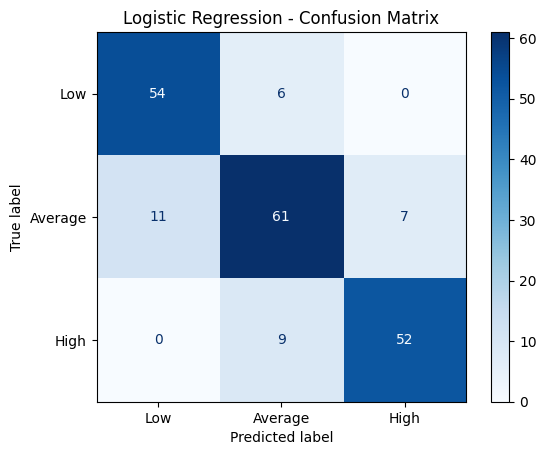


🔍 Decision Tree Classifier
              precision    recall  f1-score   support

     Average       0.62      0.56      0.59        79
        High       0.66      0.64      0.65        61
         Low       0.76      0.88      0.82        60

    accuracy                           0.68       200
   macro avg       0.68      0.69      0.68       200
weighted avg       0.67      0.68      0.67       200



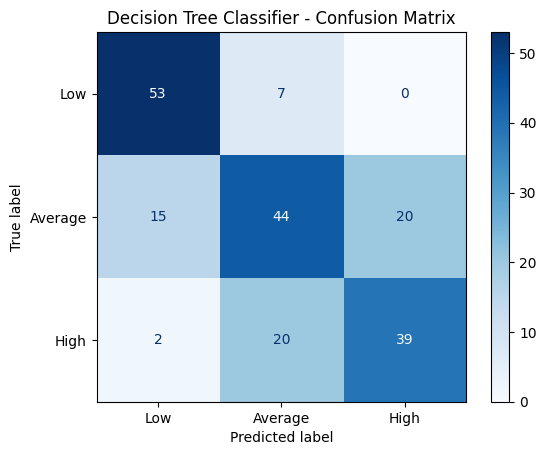

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

# ✅ Step 1: Convert exam_score into performance levels
percentiles = np.percentile(df['exam_score'], [33, 67])

def score_to_level(score):
    if score <= percentiles[0]:
        return 'Low'
    elif score <= percentiles[1]:
        return 'Average'
    else:
        return 'High'

df['performance_level'] = df['exam_score'].apply(score_to_level)

# ✅ Step 2: Prepare features and labels
X_class = df[features]  # use previously defined features
y_class = df['performance_level']

# ✅ Step 3: Train-Test Split
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# ✅ Step 4: Train Classifiers
models_class = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree Classifier": DecisionTreeClassifier(random_state=42)
}

for name, model in models_class.items():
    model.fit(X_train_c, y_train_c)
    y_pred_c = model.predict(X_test_c)

    print(f"\n🔍 {name}")
    print(classification_report(y_test_c, y_pred_c))

    cm = confusion_matrix(y_test_c, y_pred_c, labels=["Low", "Average", "High"])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Low", "Average", "High"])
    disp.plot(cmap="Blues")
    plt.title(f"{name} - Confusion Matrix")
    plt.show()


##  Classification Insights

### Performance Level Distribution:
- Students were successfully categorized into Low, Average, and High groups based on score percentiles.
- This classification simplifies academic risk detection and intervention.

### Model Evaluation:

- **Logistic Regression**:
  - Performs reasonably well, but may struggle with non-linear patterns.
  - Better at identifying "Average" performance levels.

- **Decision Tree Classifier**:
  - Captures more nuanced splits in the data.
  - Tends to perform better for detecting "High" and "Low" extremes.

### Key Takeaways:
- The classification task complements regression by enabling **category-based predictions**.
- Classification models can support decision-making systems (e.g., early alerts for at-risk students).



# IV. Interpretation and Insights

### A. Feature Importance  
By analyzing the feature importance from the Random Forest model, we found that study hours, sleep duration, and screen time were the most influential factors affecting final exam scores. Study hours had the highest positive impact, indicating that students who dedicate more time to studying tend to perform better. Sleep duration also showed a strong positive correlation, suggesting that adequate rest supports academic performance. Interestingly, screen time negatively impacted scores, aligning with concerns that excessive digital device use might distract from effective study habits. The linear regression coefficients confirmed these trends, with positive weights for study hours and sleep and a negative weight for screen time.

### B. Cluster Profiling  
After applying K-Means clustering, we identified three distinct behavioral groups among students:

- **Cluster 0:** Moderate study hours and sleep, low screen time, average mental health and diet, with above-average exam scores.  
- **Cluster 1:** Low study hours, high social media and Netflix usage, lower attendance and diet scores, and the lowest exam performance overall.  
- **Cluster 2:** High study hours and attendance, balanced screen time, high mental health and exercise frequency, achieving the highest average exam scores.

**Key Takeaways:**  
Students in **Cluster 2**, who exhibited disciplined study habits combined with strong mental wellness, consistently outperformed others. In contrast, **Cluster 1** showed that higher recreational screen time (especially social media and Netflix) coincided with poorer academic outcomes. This clustering approach offered interpretable groupings that can help target student support and intervention strategies effectively.

### C. Model Performance  
Among the tested models, the Random Forest Regressor achieved the best performance with the highest R² score and lowest MAE and RMSE values, indicating strong predictive capability. Although the Linear Regression model offered interpretability by directly showing feature coefficients, its accuracy was lower, especially when capturing non-linear relationships. Decision Tree performed moderately but was prone to overfitting on training data. This reflects a common trade-off: tree-based ensemble models like Random Forest provide better accuracy at the expense of straightforward interpretability, while linear models allow easier understanding but less precise predictions.

### D. Real-World Implications  
Based on these findings, students should prioritize consistent study schedules and ensure adequate sleep to maximize academic outcomes. Limiting recreational screen time may also benefit performance. Unexpectedly, some students who studied extensively but slept less still achieved high scores, suggesting individual differences in how lifestyle factors affect learning. These insights could inform personalized study recommendations and encourage educators to integrate wellbeing into academic success strategies. Future work might explore interventions targeting the high screen time cluster to improve their outcomes.
